In [5]:
from utils_real_data import *

In [6]:
plt.rcParams.update({'lines.linewidth': 3})

ds_name = {}
ds_name['mainz'], ds_name['trans'], ds_name['vdx'] = 'Mainz', 'Transbig', 'VDX'
ds_name['PAM_50'], ds_name['HK_3'], ds_name['PAM_50_PCA'] = 'PAM 50', '3 genes', 'PAM 50 PCA'
ds_name['top'], ds_name['top_pca'] = 'Top 0.5%', 'PCA Top 0.5%'
real_data = np.load('results/scores_labels.npy', allow_pickle=1).item()

data_ =  real_data.keys()
methodz =  list(real_data[list(data_)[0]].keys())

min_k, max_k = 2, 8
color_, marker_, lins_ = ['blue', 'orange'], ['^', '*', 'o'], ['-', '-.', ':']

KeyError: 'PAM_50'

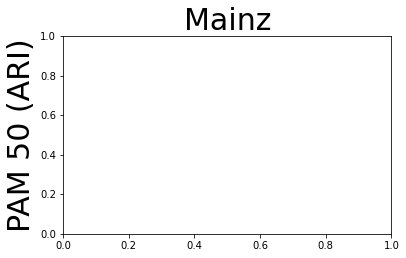

In [3]:
plt.figure(figsize = (20,8))

for t, test in enumerate(['mainz', 'trans', 'vdx']):
    for d, data_ in enumerate(['PAM_50',  'HK_3']):

        c = 0
        plt.subplot(2, 3, 1 + t + 3*d)

        if d == 0:
            plt.title(ds_name[test], fontsize = 30)
        if t == 0:
            plt.ylabel(ds_name[data_]+' (ARI)', fontsize = 30)
        c = 0
        for m, method in enumerate(['Birch']):
            for tr, train in enumerate(['mainz', 'trans', 'vdx']):
                
                
                if train != test:
                    
                    plt.scatter(range(min_k, max_k+1), real_data[data_][method]['ami'][train+'_'+test].mean(axis = 1), color = color_[1], marker = marker_[tr], s = 180)
                    plt.scatter(range(min_k, max_k+1), real_data[data_][method]['ari'][train+'_'+test].mean(axis = 1), color = color_[0], marker = marker_[tr], s = 180)
                    
                    if d == 0:

                        plt.errorbar(range(min_k, max_k+1), real_data[data_][method]['ari'][train+'_'+test].mean(axis = 1), yerr=real_data[data_][method]['ari'][train+'_'+test].std(axis = 1), color = color_[0], linestyle = lins_[tr], label = ds_name[train])
                        plt.errorbar(range(min_k, max_k+1), real_data[data_][method]['ami'][train+'_'+test].mean(axis = 1), yerr=real_data[data_][method]['ami'][train+'_'+test].std(axis = 1), color = color_[1], linestyle = lins_[tr])
                        plt.legend(fontsize = 20)
                        
                    if d == 1:
                        
                        plt.errorbar(range(min_k, max_k+1), real_data[data_][method]['ari'][train+'_'+test].mean(axis = 1), yerr=real_data[data_][method]['ari'][train+'_'+test].std(axis = 1), color = color_[0], linestyle = lins_[tr], label = 'ARI')
                        plt.errorbar(range(min_k, max_k+1), real_data[data_][method]['ami'][train+'_'+test].mean(axis = 1), yerr=real_data[data_][method]['ami'][train+'_'+test].std(axis = 1), color = color_[1], linestyle = lins_[tr], label = 'AMI')
                        
                        if c==0:
                            plt.legend(fontsize = 20)
                        c+=1
                        plt.xlabel('Number of clusters', fontsize = 25)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.xticks(np.arange(2,9))
        plt.ylim([0.25,1])
        
# plt.savefig('plots/ami_ari_comparison.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

In [ ]:
plt.figure(figsize = (20,24))
color_ = ['red', 'blue', 'green']
marker_ = ['X', '*', 'o']
lins_ = ['-', '-.', ':']
for t, test in enumerate(['mainz', 'trans', 'vdx']):
    for d, data_ in enumerate(real_data.keys()):

        c = 0
        plt.subplot(len(real_data.keys()), 3, 1 + t + 3*d)

        if d == 0:
            plt.title(ds_name[test], fontsize = 30)
        if t == 0:
            plt.ylabel(ds_name[data_]+' (ARI)', fontsize = 30)
        for m, method in enumerate(list(methodz)):
            for tr, train in enumerate(['mainz', 'trans', 'vdx']):
                if train != test:
                    plt.scatter(range(min_k, max_k+1), real_data[data_][method]['ari'][train+'_'+test].mean(axis = 1), color = color_[m], marker = marker_[tr])
                    if d == 0:
                        if train!= test:
                            plt.errorbar(range(min_k, max_k+1), real_data[data_][method]['ari'][train+'_'+test].mean(axis = 1), yerr=real_data[data_][method]['ari'][train+'_'+test].std(axis = 1), color = color_[m], linestyle = lins_[tr], label = ds_name[train])

                            if c<2:
                                pass
                                plt.legend(fontsize = 20)
                            c+=1
                    else:
                        plt.errorbar(range(min_k, max_k+1), real_data[data_][method]['ari'][train+'_'+test].mean(axis = 1), yerr=real_data[data_][method]['ari'][train+'_'+test].std(axis = 1), color = color_[m], linestyle = lins_[tr])
                        

        if d == len(real_data.keys())-1:
            plt.xlabel('Number of clusters', fontsize = 25)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.xticks(np.arange(2,9))
        plt.ylim([0.25,1])
        
# plt.savefig('plots/3_pam_pca_top_ari.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

In [ ]:
## SUBTYPES

mainz_subtypes = pd.read_csv('r_data/mainz_subtypes.csv')
mainz_labels_3 = np.asarray([int(np.where(u==np.unique(mainz_subtypes['HK_3GENE']))[0]) for u in mainz_subtypes['HK_3GENE']])
mainz_labels_pam = np.asarray([int(np.where(u==np.unique(mainz_subtypes['PAM50']))[0]) for u in mainz_subtypes['PAM50']])
trans_subtypes = pd.read_csv('r_data/transbig_subtypes.csv')
trans_labels_3 = np.asarray([int(np.where(u==np.unique(trans_subtypes['HK_3GENE']))[0]) for u in trans_subtypes['HK_3GENE']])
trans_labels_pam = np.asarray([int(np.where(u==np.unique(trans_subtypes['PAM50']))[0]) for u in trans_subtypes['PAM50']])
vdx_subtypes = pd.read_csv('r_data/vdx_subtypes.csv')
vdx_labels_3 = np.asarray([int(np.where(u==np.unique(vdx_subtypes['HK_3GENE']))[0]) for u in vdx_subtypes['HK_3GENE']])
vdx_labels_pam = np.asarray([int(np.where(u==np.unique(vdx_subtypes['PAM50']))[0]) for u in vdx_subtypes['PAM50']])

In [ ]:
best_labels, repro_scores = {}, {}
mainz_labels_3_merged = mainz_labels_3 - (mainz_labels_3>2).astype(int)
trans_labels_3_merged = trans_labels_3 - (trans_labels_3>2).astype(int)
vdx_labels_3_merged = vdx_labels_3 - (vdx_labels_3>2).astype(int)
three_labels=[mainz_labels_3, trans_labels_3, vdx_labels_3]
three_labels_merged = [mainz_labels_3_merged, trans_labels_3_merged, vdx_labels_3_merged]

mainz_labels_pam_merged = mainz_labels_pam - 2*(mainz_labels_pam==4).astype(int)
trans_labels_pam_merged = trans_labels_pam - 2*(trans_labels_pam==4).astype(int)
vdx_labels_pam_merged = vdx_labels_pam - 2*(vdx_labels_pam==4).astype(int)

mainz_labels_pam_merged_2 = mainz_labels_pam - (mainz_labels_pam==3).astype(int) - 2*(mainz_labels_pam==4).astype(int)
trans_labels_pam_merged_2 = trans_labels_pam - (trans_labels_pam==3).astype(int) - 2*(trans_labels_pam==4).astype(int)
vdx_labels_pam_merged_2 = vdx_labels_pam - (vdx_labels_pam==3).astype(int) - 2*(vdx_labels_pam==4).astype(int)

pam_labels = [mainz_labels_pam, trans_labels_pam, vdx_labels_pam]
pam_labels_merged_2 = [mainz_labels_pam_merged, trans_labels_pam_merged, vdx_labels_pam_merged]
pam_labels_merged = [mainz_labels_pam_merged_2, trans_labels_pam_merged_2, vdx_labels_pam_merged_2]

for d, data_ in enumerate(real_data.keys()):
#     print(data_)
    best_labels[data_] = {}
    repro_scores[data_] = {}
    for c, couple in enumerate(real_data[data_]['Kmeans']['ari'].keys()):
        best_index = np.argmax(real_data[data_]['Kmeans']['ari'][couple], axis = 1)
        best_labels[data_][couple] = np.asarray([real_data[data_]['Kmeans']['predicted_labels'][couple][i, best_index[i]] for i in range(7)])
    
        repro_scores[data_][couple] = {}
        test_set_index = c % 3
#         print(couple)
        
        if d == 0:

            repro_scores[data_][couple]['ari'] = np.asarray([ari__(three_labels[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            repro_scores[data_][couple]['ami'] = np.asarray([ami__(three_labels[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            
            repro_scores[data_][couple]['ari_merged'] = np.asarray([ari__(three_labels_merged[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            repro_scores[data_][couple]['ami_merged'] = np.asarray([ami__(three_labels_merged[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            
            repro_scores[data_][couple]['ari_merged_2'] = np.asarray([ari__(pam_labels_merged_2[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            repro_scores[data_][couple]['ami_merged_2'] = np.asarray([ami__(pam_labels_merged_2[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
        
        if d == 1:
            repro_scores[data_][couple]['ari'] = np.asarray([ari__(three_labels[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            repro_scores[data_][couple]['ami'] = np.asarray([ami__(three_labels[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            
            repro_scores[data_][couple]['ari_merged'] = np.asarray([ari__(three_labels_merged[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
            repro_scores[data_][couple]['ami_merged'] = np.asarray([ami__(three_labels_merged[test_set_index], best_labels[data_][couple][i]) for i in range(7)])
        

In [ ]:
plt.figure(figsize = (20,8))
for t, test in enumerate(['mainz', 'trans', 'vdx']):
    for d, data_ in enumerate(['PAM_50',  'HK_3']):
        c = 0
        plt.subplot(2, 3, 1 + t + 3*d)

        if d == 0:
            plt.title(ds_name[test], fontsize = 30)
        if t == 0:
            plt.ylabel(ds_name[data_]+', AMI', fontsize = 30)
        for m, method in enumerate(list(methodz)):
            for tr, train in enumerate(['mainz', 'trans', 'vdx']):
                if train != test:
                
                    plt.scatter(range(min_k, max_k+1), repro_scores[data_][train+'_'+test]['ari_merged'], color = 'k', marker = marker_[tr])
                    plt.plot(range(min_k, max_k+1),  repro_scores[data_][train+'_'+test]['ari_merged'], color = 'k', linestyle = lins_[tr])

#                     plt.scatter(range(min_k, max_k+1), repro_scores[data_][train+'_'+test]['ami'], color = 'k', marker = marker_[tr])
#                     plt.plot(range(min_k, max_k+1),  repro_scores[data_][train+'_'+test]['ami'], color = 'k', linestyle = lins_[tr])
                    
                    
        if d == 1:
            plt.xlabel('Number of clusters', fontsize = 25)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.xticks(np.arange(2,9))
        if d == 0:
            plt.ylim([0.25,1])
        if d == 1:
            plt.ylim([.3,1])
        
# plt.savefig('plots/gold_std2.pdf', dpi = 1000, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In [ ]:
known_labels = trans_subtypes
# real_data = np.load('results/scores_labels.npy').item()
best_labels = {}
cols_ = ['green', 'orange', 'blue', 'red', 'k']
cmap = plt.get_cmap('cool')
marker_ls = ['v', '^', 'X', '*', '8']
s_ = [100, 100, 100, 200, 100]

three_labs_names = known_labels.HK_3GENE
pam_labs_names = known_labels.PAM50
three_unique_names = np.unique(three_labs_names)
three_labs = np.asarray([np.where(three_labs_names[i] ==  three_unique_names)[0][0] for i in range(len(three_labs_names))])
pam_unique_names = np.unique(pam_labs_names)
pam_labs = np.asarray([np.where(pam_labs_names[i] ==  pam_unique_names)[0][0] for i in range(len(pam_labs_names))])
# fc = ''
for d, data_ in enumerate(real_data.keys()):
    print(data_)
    best_labels[data_] = {}
    for c, couple in enumerate(real_data[data_]['Kmeans']['ari'].keys()):
        best_index = np.argmax(real_data[data_]['Kmeans']['ari'][couple], axis = 1)
        best_labels[data_][couple] = np.asarray([real_data[data_]['Kmeans']['predicted_labels'][couple][i, best_index[i]] for i in range(7)])
labs = best_labels['HK_3']['mainz_trans'][2].astype(int)
labs2 = best_labels['PAM_50']['mainz_trans'][2].astype(int)

print(pd.crosstab(three_labs_names, labs) )  
print(pd.crosstab(pam_labs_names, labs2) )  

cancer_subtype = ['LumB', 'Basal', 'Her2', 'LumA']
X_embedded=np.load('r_data/tSNE_embedding_transbig.npy')
# plt.figure(figsize = (20,4.5)) #, facecolor = 'white')

ari_scores = np.load('results/score_ari_local.npy', allow_pickle=1)
ari_scores_m = ari_scores.mean(axis = 1)
ari_scores_s = np.sqrt(ari_scores.std(axis = 1))
min_m, max_m = min(ari_scores_m), max(ari_scores_m)
min_s, max_s = min(ari_scores_s), max(ari_scores_s)
ari_scores_s = (ari_scores_s - min_s) /(max_s - min_s)
ari_scores_s_2 = .5 + .5 * ari_scores_s
ari_scores_s_sh = shrink_(ari_scores_s, 2) 
ari_scores_m_2 = (ari_scores_m - min_m) / (max_m - min_m)
ind_ = [np.where(labs == i)[0] for i in range(len(np.unique(labs)))]
groups_ = [ari_scores[i] for i in ind_]
means = [i.mean(axis = 1) for i in groups_]
stds = [i.std(axis = 1) for i in groups_]
means = np.asarray(means)

In [ ]:
plt.figure(figsize = (13,8))
gridspec.GridSpec(2,10)
cols_ = ['yellowgreen', 'gold', 'springgreen', 'tomato']
# large subplot
ax = plt.subplot2grid((2,10), (0,0), colspan=4, rowspan=1)
plt.xticks([])
plt.yticks([])
seen_label = [0,0,0,0]
for point in range(len(X_embedded)):
    z = int(best_labels['HK_3']['mainz_trans'][2][point])
    
    if seen_label[z] == 0:
        seen_label[z] = 1
        plt.scatter(X_embedded[point,0], X_embedded[point,1], c= cols_[z], marker = marker_ls[z], s = s_[z], alpha = .7, label = cancer_subtype[z]) 
    else:
#         seen_label[z] = 1
        plt.scatter(X_embedded[point,0], X_embedded[point,1], c= cols_[z], marker = marker_ls[z], s = s_[z], alpha = .7) #, label = cancer_subtype[z]) 
    ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
              fancybox=True, shadow=False, ncol=1, fontsize = 16) 
ax.set_xlabel('(a)', fontsize = 18)
ax = plt.subplot2grid((2,10), (0,6), colspan = 3, rowspan = 2)

means = np.asarray(means)
my_pal = {0: "yellowgreen", 1: "gold", 3:"tomato", 2:'springgreen'}
flierprops = dict(marker='o', markerfacecolor= 'k', markersize=5,
                  linestyle='none', markeredgecolor='g')

ax = sns.boxplot(data = means, palette = my_pal, width = .85, linewidth = .9, flierprops=flierprops)
ax.set_xticklabels(cancer_subtype)
for i, box in enumerate(ax.artists):

    col = box.get_facecolor()
    # last Line2D object for each box is the box's fliers
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
plt.ylim([0,1])
plt.yticks(fontsize = 22)
plt.xticks(fontsize=18)
plt.ylabel('ARI', fontsize = 30)
ax.set_xlabel('(c)', fontsize = 18)
ax = plt.subplot2grid((2,10), (1,0), colspan = 5, rowspan = 1)


labs = best_labels['HK_3']['mainz_trans'][2].astype(int)
plt.xticks([])
plt.yticks([])
vmin_, vmax_ = min(ari_scores_m), max(ari_scores_m)
for point in range(len(X_embedded)):    
    sct = ax.scatter(X_embedded[point,0],X_embedded[point,1], vmin = vmin_, vmax = vmax_, marker = marker_ls[labs[point]], c=ari_scores_m[point], s = s_[labs[point]] * ari_scores_s_sh[point], cmap = cmap, alpha = max(min(1/ari_scores_s_sh[point], 1), .4))
ax.set_xlabel('(b)', fontsize = 18)

cbar = plt.colorbar(sct, orientation = 'vertical', format='%.1f') #, fontsize = 18)
cbar.ax.tick_params(labelsize = 18)
# plt.savefig('plots/local_repro_real_all_.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()